In [811]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [812]:
!pip install opencv-python

In [813]:
!pip install more-itertools

In [1234]:
from glob import glob
from pathlib import Path
temp_list = sorted(list(glob(r"C:\Users\lenovo\Documents\MythicalCreatures\MythticalCreaturesDataset\*\\", recursive = True)))

classes_list = [Path(x).stem for x in temp_list]
print(classes_list)

['Centaur', 'Cerberus', 'Dragon', 'Hidra', 'Meduza', 'Minotaur', 'Pegasus']


In [1235]:
import cv2
from itertools import chain

pathData = Path(r"C:\Users\lenovo\Documents\MythicalCreatures\MythticalCreaturesDataset")

for clasa in classes_list:
    pathNou = f'C:\\Users\\lenovo\\Documents\\MythicalCreatures\\MythticalCreaturesDataset1\\\\{clasa}'
    if  not os.path.exists(pathNou):
        os.mkdir(pathNou)
    testList = sorted(list(chain(pathData.rglob("*.jpeg"),pathData.rglob("*.png"),pathData.rglob("*.jpg"))))
    print(len(testList))
    for imgPath in testList:
        if clasa in str(imgPath):
            Image = cv2.imread(str(imgPath),cv2.COLOR_BGR2RGB)
            cv2.imwrite(pathNou + f'\\{imgPath.stem}.jpeg',Image)

1587
1587
1587
1587
1587
1587
1587


In [1236]:
batch_size = 32
img_height = 180
img_width = 180

In [1237]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  "MythticalCreaturesDataset1",
  validation_split=0.2, 
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1587 files belonging to 7 classes.
Using 1270 files for training.


In [1238]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  "MythticalCreaturesDataset1",
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1587 files belonging to 7 classes.
Using 317 files for validation.


In [1239]:
class_names = train_ds.class_names
print(class_names)

['Centaur', 'Cerberus', 'Dragon', 'Hidra', 'Meduza', 'Minotaur', 'Pegasus']


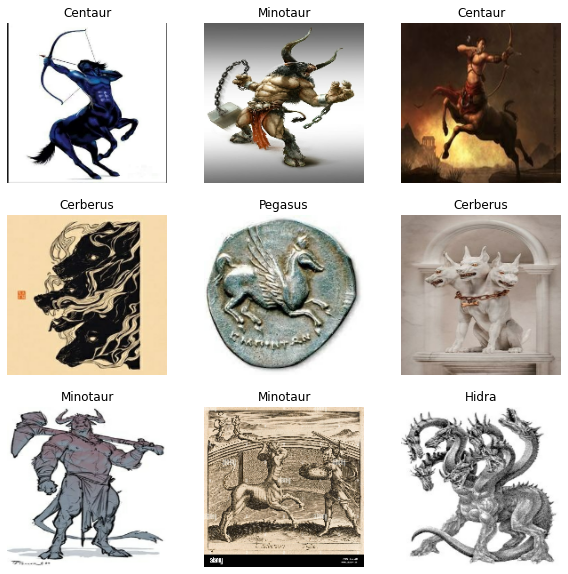

In [1240]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [1241]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [1242]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [1243]:
normalization_layer = layers.Rescaling(1./255)

In [1244]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


In [1245]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.Conv2D(128, 3, padding='same', activation='relu'),  
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [1246]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [1247]:
model.summary()

Model: "sequential_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_109 (Rescaling)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_364 (Conv2D)         (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_292 (MaxPooli  (None, 90, 90, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_365 (Conv2D)         (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_293 (MaxPooli  (None, 45, 45, 32)       0         
 ng2D)                                                           
                                                                 
 conv2d_366 (Conv2D)         (None, 45, 45, 64)     

In [1248]:
epochs=15
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = [callback]
)

Epoch 1/15
40/40 [==============================] - 79s 2s/step - loss: 1.9587 - accuracy: 0.1488 - val_loss: 1.9439 - val_accuracy: 0.1577
Epoch 2/15
40/40 [==============================] - 73s 2s/step - loss: 1.9382 - accuracy: 0.1717 - val_loss: 1.9345 - val_accuracy: 0.1577
Epoch 3/15
40/40 [==============================] - 83s 2s/step - loss: 1.8916 - accuracy: 0.2323 - val_loss: 1.8612 - val_accuracy: 0.2871
Epoch 4/15
40/40 [==============================] - 80s 2s/step - loss: 1.8064 - accuracy: 0.3181 - val_loss: 1.8019 - val_accuracy: 0.2965
Epoch 5/15
40/40 [==============================] - 75s 2s/step - loss: 1.6517 - accuracy: 0.3787 - val_loss: 1.7824 - val_accuracy: 0.3123
Epoch 6/15
40/40 [==============================] - 76s 2s/step - loss: 1.4664 - accuracy: 0.4764 - val_loss: 1.7238 - val_accuracy: 0.3375
Epoch 7/15
40/40 [==============================] - 76s 2s/step - loss: 1.2266 - accuracy: 0.5764 - val_loss: 1.7566 - val_accuracy: 0.3912
Epoch 8/15
40/40 [==

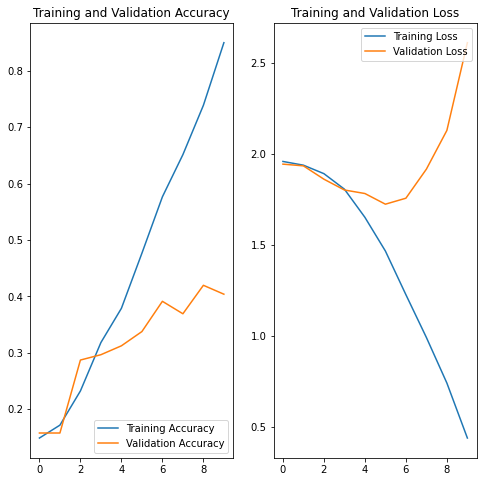

In [1249]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


#epochs_range = range(callback.stopped_epoch + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1250]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

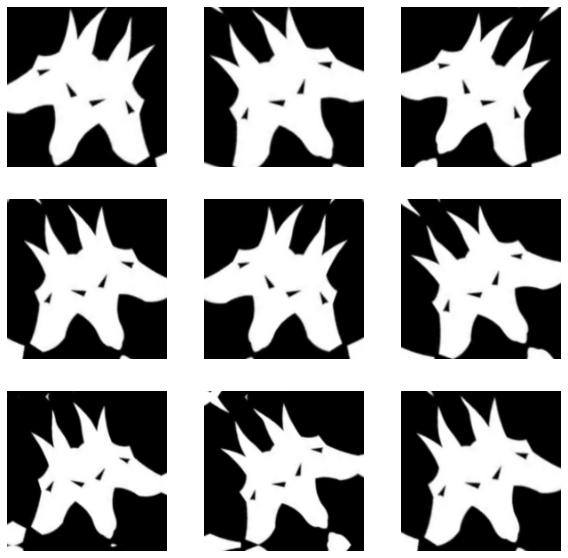

In [1251]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [1252]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'), 
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'), 
  layers.Conv2D(128, 3, padding='same', activation='relu'),  
  layers.MaxPooling2D(), 
  layers.Flatten(),
  layers.Dropout(0.5),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation = 'softmax')
])

In [1253]:
model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              loss=['sparse_categorical_crossentropy'],
              metrics=['accuracy'])

In [1254]:
model.summary()

Model: "sequential_110"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_109 (Sequential)  (None, 180, 180, 3)      0         
                                                                 
 rescaling_110 (Rescaling)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_369 (Conv2D)         (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_296 (MaxPooli  (None, 90, 90, 16)       0         
 ng2D)                                                           
                                                                 
 conv2d_370 (Conv2D)         (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_297 (MaxPooli  (None, 45, 45, 32)       0         
 ng2D)                                              

In [1255]:
epochs = 45
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4)
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks = [callback]  
)

Epoch 1/45
40/40 [==============================] - 128s 3s/step - loss: 1.9482 - accuracy: 0.1378 - val_loss: 1.9458 - val_accuracy: 0.1451
Epoch 2/45
40/40 [==============================] - 108s 3s/step - loss: 1.9410 - accuracy: 0.1787 - val_loss: 1.9222 - val_accuracy: 0.1861
Epoch 3/45
40/40 [==============================] - 106s 3s/step - loss: 1.9262 - accuracy: 0.1874 - val_loss: 1.9399 - val_accuracy: 0.1577
Epoch 4/45
40/40 [==============================] - 109s 3s/step - loss: 1.9114 - accuracy: 0.1937 - val_loss: 1.8985 - val_accuracy: 0.2303
Epoch 5/45
40/40 [==============================] - 101s 3s/step - loss: 1.8809 - accuracy: 0.2291 - val_loss: 1.8567 - val_accuracy: 0.2271
Epoch 6/45
40/40 [==============================] - 102s 3s/step - loss: 1.8356 - accuracy: 0.2622 - val_loss: 1.8669 - val_accuracy: 0.2461
Epoch 7/45
40/40 [==============================] - 105s 3s/step - loss: 1.8008 - accuracy: 0.2929 - val_loss: 1.8222 - val_accuracy: 0.2965
Epoch 8/45
40

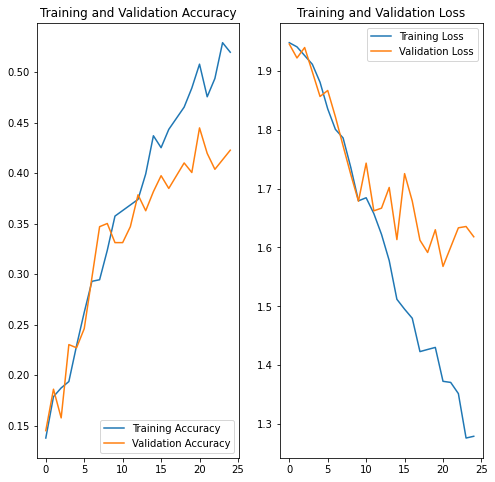

In [1256]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# epochs_range = range(callback.stopped_epoch + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
# plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [1257]:
image = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Centaurtest.jpeg'),target_size=(img_height, img_width))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
# input_arr = np.array([input_arr])  # Convert single image to a batch.
input_arr = tf.expand_dims(input_arr, 0) # Create a batch
predictions = model.predict(input_arr)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to Centaur with a 30.33 percent confidence.


In [1258]:
def preparePred (image):
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = tf.expand_dims(input_arr, 0) # Create a batch
    predictions = model.predict(input_arr)
    print(predictions)
    score = tf.nn.softmax(predictions[0])
    print(score)
    print (100 * np.max(score))
    
    return class_names[np.argmax(score)]


image = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Meduzatest3.jpeg'),target_size=(img_height, img_width))
preparePred(image)

[[0.0275137  0.16347957 0.12008221 0.23199446 0.12623419 0.31097722
  0.01971862]]
tf.Tensor(
[0.12669082 0.1451424  0.13897833 0.15543541 0.13983597 0.16820998
 0.12570709], shape=(7,), dtype=float32)
16.82099848985672


'Minotaur'

In [1259]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

image = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Centaurtest2.jpeg'),target_size=(img_height, img_width))
image2 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Centaurtest.jpeg'),target_size=(img_height, img_width))
image3 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Minotest.jpeg'),target_size=(img_height, img_width))
image4 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Meduzatest2.jpeg'),target_size=(img_height, img_width))
image5 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Meduzatest3.jpeg'),target_size=(img_height, img_width))
image6 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Minotest2.jpeg'),target_size=(img_height, img_width))
image7 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Pegastest.jpeg'),target_size=(img_height, img_width))
image8 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\cerbtest.jpeg'),target_size=(img_height, img_width))
image9 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\hidratest.jpeg'),target_size=(img_height, img_width))
image10 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\dragontest.jpeg'),target_size=(img_height, img_width))
image11 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\dragontest2.jpeg'),target_size=(img_height, img_width))
image12 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\dragontest3.jpeg'),target_size=(img_height, img_width))
image13 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\cerbtest2.jpeg'),target_size=(img_height, img_width))
image14 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\dragontest4.jpeg'),target_size=(img_height, img_width))
image15 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\hidratest2.jpeg'),target_size=(img_height, img_width))
image16 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\cerbtest3.jpeg'),target_size=(img_height, img_width))
image17 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\hidratest3.jpeg'),target_size=(img_height, img_width))
image18 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\cerbtest4.jpeg'),target_size=(img_height, img_width))
image19 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\cerbtest5.jpeg'),target_size=(img_height, img_width))


y_true = ["Centaur", "Centaur", "Minotaur", "Meduza", "Meduza", "Minotaur", "Pegasus", "Cerberus", "Hidra","Dragon", "Dragon", "Dragon", "Cerberus", "Dragon", "Hidra","Cerberus", "Hidra","Cerberus","Cerberus"]
imageList = [image, image2, image3, image4, image5, image6, image7, image8, image9,image10,image11,image12, image13,image14, image15,image16, image17,image18,image19]
y_pred = [preparePred(images) for images in imageList] 

print('Confusion Matrix:')
print(confusion_matrix(y_true, y_pred, labels=["Centaur", "Cerberus","Dragon", "Hidra", "Meduza", "Minotaur", "Pegasus"]))

print()

print('Classification raport:')
print(classification_report(y_true, y_pred, target_names=class_names))

print()

print(r"The precision score for this model is {}".format(precision_score(y_true, y_pred, average=None, zero_division=0)))
print(r"The recall score score for this model is {}".format(recall_score(y_true, y_pred, average=None, zero_division=0)))
print(r"The f1 score for this model is {}".format(f1_score(y_true, y_pred, average=None)))
print(r"The accuracy score for this model is {}".format(accuracy_score(y_true, y_pred)))

print()

print(r"The precision score for this model is {}".format(precision_score(y_true, y_pred, average='weighted', zero_division=0)))
print(r"The recall score score for this model is {}".format(recall_score(y_true, y_pred, average='weighted', zero_division=0)))
print(r"The f1 score for this model is {}".format(f1_score(y_true, y_pred, average='weighted')))
print(r"The accuracy score for this model is {}".format(accuracy_score(y_true, y_pred)))


[[0.3872606  0.21457176 0.11183782 0.01915468 0.11199929 0.0958833
  0.0592926 ]]
tf.Tensor(
[0.18116967 0.15243605 0.13755326 0.12537737 0.13757548 0.13537608
 0.13051212], shape=(7,), dtype=float32)
18.116967380046844
[[9.6596777e-01 1.5919646e-02 1.2504426e-03 1.3795554e-03 3.0554351e-05
  1.1105461e-02 4.3465379e-03]]
tf.Tensor(
[0.303332   0.11730529 0.11559707 0.11561199 0.11545614 0.11674191
 0.11595552], shape=(7,), dtype=float32)
30.333200097084045
[[0.20332535 0.368302   0.12952144 0.04362988 0.06563585 0.15534663
  0.03423889]]
tf.Tensor(
[0.15083908 0.17789441 0.14010745 0.12857573 0.13143653 0.14377287
 0.12737393], shape=(7,), dtype=float32)
17.789441347122192
[[1.3684243e-03 4.9667794e-04 9.0044029e-03 6.7486346e-02 9.1898793e-01
  9.1103435e-04 1.7451912e-03]]
tf.Tensor(
[0.11657199 0.11647041 0.11746554 0.12454    0.2918175  0.11651869
 0.11661592], shape=(7,), dtype=float32)
29.181748628616333
[[0.0275137  0.16347957 0.12008221 0.23199446 0.12623419 0.31097722
  0.019

In [1260]:
# # Convert the model.
# converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tflite_model = converter.convert()

# # Save the model.
# with open('modelfd175x175.tflite', 'wb') as f:
#     f.write(tflite_model)

In [1341]:
img_height, img_width = 180, 180

image = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Centaurtest2.jpeg'),target_size=(img_height, img_width))
image2 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Centaurtest.jpeg'),target_size=(img_height, img_width))
image3 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Minotest.jpeg'),target_size=(img_height, img_width))
image4 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Meduzatest2.jpeg'),target_size=(img_height, img_width))
image5 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Meduzatest3.jpeg'),target_size=(img_height, img_width))
image6 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Minotest2.jpeg'),target_size=(img_height, img_width))
image7 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Pegastest.jpeg'),target_size=(img_height, img_width))
image8 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\cerbtest.jpeg'),target_size=(img_height, img_width))
image9 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\hidratest.jpeg'),target_size=(img_height, img_width))
image10 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\dragontest.jpeg'),target_size=(img_height, img_width))
image11 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\dragontest2.jpeg'),target_size=(img_height, img_width))
image12 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\dragontest3.jpeg'),target_size=(img_height, img_width))
image13 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\cerbtest2.jpeg'),target_size=(img_height, img_width))
image14 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\dragontest4.jpeg'),target_size=(img_height, img_width))
image15 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\hidratest2.jpeg'),target_size=(img_height, img_width))
image16 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\cerbtest3.jpeg'),target_size=(img_height, img_width))
image17 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\hidratest3.jpeg'),target_size=(img_height, img_width))
image18 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\cerbtest4.jpeg'),target_size=(img_height, img_width))
image19 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\cerbtest5.jpeg'),target_size=(img_height, img_width))
image20 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Pegastest2.jpeg'),target_size=(img_height, img_width))
image21 = tf.keras.preprocessing.image.load_img(Path(r'C:\Users\lenovo\Downloads\Pegastest3.jpeg'),target_size=(img_height, img_width))


y_true = ["Centaur", "Centaur", "Minotaur", "Meduza", "Meduza", "Minotaur", "Pegasus", "Cerberus", "Hidra","Dragon", "Dragon","Cerberus","Hidra","Dragon","Hidra","Cerberus","Pegasus"]
imageList = [image, image2, image3, image4, image5, image6, image7, image8, image9, image10, image12, image13, image15,image14,image17,image19, image21]

In [1342]:
import numpy as np


def testare(image):
    
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = tf.expand_dims(input_arr, 0) # Create a batch
    
    # Load TFLite model and allocate tensors.
    interpreter = tf.lite.Interpreter(model_path="model2x1282x64.tflite")
    interpreter.allocate_tensors()

    # Get input and output tensors.
    input_details = interpreter.get_input_details()[0]
    output_details = interpreter.get_output_details()[0]

    # Test model on random input data.
#     input_shape = input_details['shape']
#     input_data = np.array(y_testare, dtype=np.float32)
    
    interpreter.set_tensor(input_details['index'], input_arr)

    interpreter.invoke()

    # The function `get_tensor()` returns a copy of the tensor data.
    # Use `tensor()` in order to get a pointer to the tensor.
    output_data = interpreter.get_tensor(output_details['index'])
    print(output_data)
    print(output_data.shape)
    return output_data

score = tf.nn.softmax(testare(image))
print (100 * np.max(score))
print(class_names[np.argmax(score)])

[[0.84450996 0.05836577 0.01071064 0.00923026 0.00121012 0.04232282
  0.03365039]]
(1, 7)
27.420860528945923
Centaur


In [1343]:
import sklearn as skl

def prezicere(image):
    score = tf.nn.softmax(testare(image))
    print (100 * np.max(score))
    return class_names[np.argmax(score)]

y_pred = [ prezicere(images)  for images in imageList]
acc_score = skl.metrics.accuracy_score(y_true, y_pred)
confusion_mat = confusion_matrix(y_true, y_pred)


# Print the accuracy score and confusion matrix
print("Confusion matrix")
print(confusion_mat)
print()

print(r"The precision score for this model is {}".format(precision_score(y_true, y_pred, average=None, zero_division=0)))
print(r"The recall score score for this model is {}".format(recall_score(y_true, y_pred, average=None, zero_division=0)))
print(r"The f1 score for this model is {}".format(f1_score(y_true, y_pred, average=None)))

print()

print(r"The precision score for this model is {}".format(precision_score(y_true, y_pred, average='weighted', zero_division=0)))
print(r"The recall score score for this model is {}".format(recall_score(y_true, y_pred, average='weighted', zero_division=0)))
print(r"The f1 score for this model is {}".format(f1_score(y_true, y_pred, average='weighted')))
print("Accuracy score:", acc_score)

[[0.84450996 0.05836577 0.01071064 0.00923026 0.00121012 0.04232282
  0.03365039]]
(1, 7)
27.420860528945923
[[8.6534983e-01 3.6310274e-02 2.1961333e-02 3.0894091e-02 1.7812726e-04
  8.1606675e-03 3.7145585e-02]]
(1, 7)
27.909615635871887
[[0.0289744  0.37538666 0.18735749 0.06493858 0.05219417 0.17787988
  0.11326891]]
(1, 7)
17.911648750305176
[[1.5612181e-03 3.4028586e-04 8.8171352e-04 1.7963037e-02 9.7440231e-01
  2.0835188e-03 2.7679217e-03]]
(1, 7)
30.54150938987732
[[0.07927585 0.04621858 0.08220829 0.27513632 0.32338974 0.14279918
  0.05097204]]
(1, 7)
17.017720639705658
[[0.202026   0.06371478 0.01129072 0.10444185 0.03921025 0.56378984
  0.01552653]]
(1, 7)
21.368007361888885
[[0.4026806  0.02909701 0.04719469 0.01485446 0.06029876 0.04053022
  0.4053442 ]]
(1, 7)
18.308377265930176
[[2.5605253e-04 6.1883932e-01 1.4246820e-01 4.7726545e-04 1.6827018e-05
  6.7478004e-03 2.3119447e-01]]
(1, 7)
22.431515157222748
[[5.9408802e-01 2.2746101e-01 8.3248364e-03 7.1418593e-03 7.697768